### make a flowchart using graphviz

In [123]:
import graphviz

In [124]:
# start of the object
dot = graphviz.Digraph(comment='flowchart')
dot.attr(newrank='true', compound='true') 

#define styles
input_style = {'shape':'folder','fontsize':'12pt','color':'black','fillcolor':'#377eb880','style':'filled'}
method_style = {'shape':'box','fillcolor':'#ff7f0080', 'style':'filled'}
classifier_style = {'shape':'box', 'fillcolor':'#4daf4a80', 'style':'rounded, filled'}
marker_cluster_style = {'shape':'box', 'color':'#f781bf80', 'fillcolor':'mediumseagreen'}
white_style = {'shape':'plaintext'}
metadata_style = {'shape':'note'}

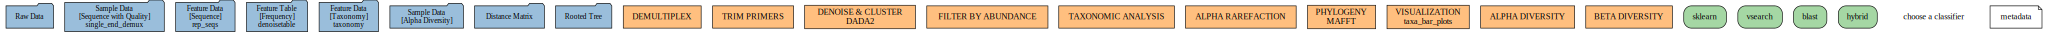

In [125]:
#input data
dot.node('dt1', 'Raw Data', input_style)
dot.node('dt2', 'Sample Data\n[Sequence with Quality]\nsingle_end_demux', input_style)
dot.node('dt3', 'Feature Data\n[Sequence]\nrep_seqs', input_style)
dot.node('dt4', 'Feature Table\n[Frequency]\ndenoisetable',input_style)
dot.node('dt5', 'Feature Data\n[Taxonomy]\ntaxonomy',input_style)
dot.node('dt6', 'Sample Data\n[Alpha Diversity]',input_style)
dot.node('dt7', 'Distance Matrix',input_style)
dot.node('dt8', 'Rooted Tree',input_style)
#methods
dot.node('mt1', 'DEMULTIPLEX', method_style)
dot.node('mt2', 'TRIM PRIMERS', method_style)
dot.node('mt3', 'DENOISE & CLUSTER\nDADA2', method_style)
dot.node('mt4', 'FILTER BY ABUNDANCE', method_style)
dot.node('mt5', 'TAXONOMIC ANALYSIS', method_style)
dot.node('mt6', 'ALPHA RAREFACTION', method_style)
dot.node('mt7', 'PHYLOGENY\nMAFFT', method_style)
dot.node('mt8', 'VISUALIZATION\ntaxa_bar_plots', method_style)
dot.node('mt9', 'ALPHA DIVERSITY', method_style)
dot.node('mt10', 'BETA DIVERSITY', method_style)

#classifiers
dot.node('ct1', 'sklearn', classifier_style)
dot.node('ct2', 'vsearch', classifier_style)
dot.node('ct3', 'blast', classifier_style)
dot.node('ct4', 'hybrid', classifier_style)
#random
dot.node('rd1', 'choose a classifier', white_style)
dot.node('md1', 'metadata', metadata_style)

dot

In [126]:
#define clusters, name has to start with cluster_
with dot.subgraph(name='cluster_import_data') as cluster:
    cluster.edges([('dt2','mt2'), ('mt2', 'mt3'), ('mt3','mt4'), ('mt4','dt3'), ('mt4','dt4')])
    cluster.attr(label='', **marker_cluster_style)
    
with dot.subgraph(name='cluster_taxonomic_analysis') as cluster:
    cluster.edges([('mt5','ct1'), ('mt5', 'ct2'), ('mt5','ct3'), ('mt5','ct4'), ('rd1', 'dt5')])
    cluster.attr(label='', **marker_cluster_style)
    
with dot.subgraph(name='cluster_diversity') as cluster:
    cluster.edges([('mt6','mt9'), ('mt9','dt6'), ('mt6', 'mt10'), ('mt10', 'dt7')])
    cluster.attr(label='', **marker_cluster_style)
    
with dot.subgraph(name='cluster_prep') as cluster:
    cluster.edges([('dt1','mt1')])
    cluster.attr(label='', style = 'dotted')
    
with dot.subgraph(name='cluster_phylogeny') as cluster:
    cluster.edges([('mt7','dt8')])
    cluster.attr(label='', **marker_cluster_style)

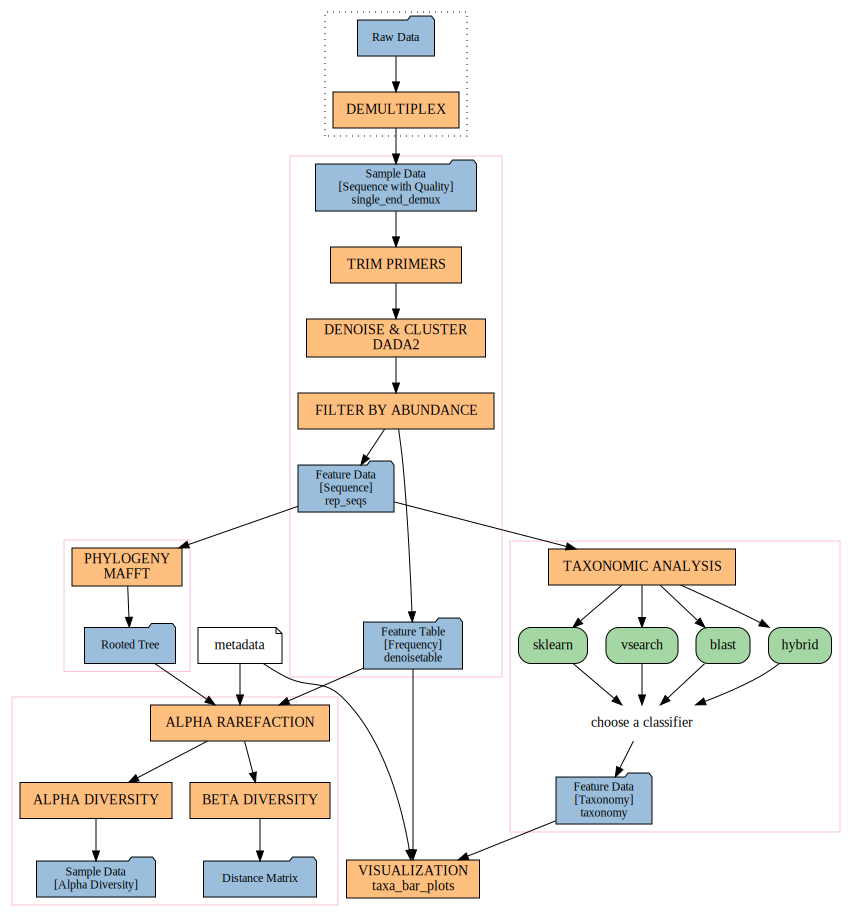

In [127]:
# add edges
dot.edge('mt1','dt2')
dot.edge('dt3', 'mt5')
dot.edge('dt4', 'mt6')
dot.edge('dt8', 'mt6')
dot.edge('dt3', 'mt7')
dot.edge('dt4','mt8')
dot.edge('dt5','mt8')
dot.edge('md1','mt8')
dot.edge('md1','mt6')
#dot.edge('md1','mt8')

metadata_related = []
for mr in metadata_related:
    dot.edge('md1', f'{mr}')

# connect two clusters
# dot.edge('mt5', 'mt6', ltail='cluster_taxonomic_analysis', lhead='cluster_diversity')

classifiers = ['ct1','ct2', 'ct3', 'ct4']
for c in classifiers:
    dot.edge(f'{c}', 'rd1')#, style='dotted')
dot

In [128]:
# copy this to https://dreampuf.github.io/GraphvizOnline/ or https://sketchviz.com/new
print(dot.source)

// flowchart
digraph {
	compound=true newrank=true
	dt1 [label="Raw Data" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt2 [label="Sample Data
[Sequence with Quality]
single_end_demux" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt3 [label="Feature Data
[Sequence]
rep_seqs" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt4 [label="Feature Table
[Frequency]
denoisetable" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt5 [label="Feature Data
[Taxonomy]
taxonomy" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt6 [label="Sample Data
[Alpha Diversity]" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt7 [label="Distance Matrix" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=filled]
	dt8 [label="Rooted Tree" color=black fillcolor="#377eb880" fontsize="12pt" shape=folder style=fill